In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('cleanedData.csv')
df.head(5)

,City_A,City_Abbeville,City_Akron,City_Alameda,City_Albany,City_Albuquerque,City_Aldie,City_Aledo,City_Alhambra,City_Allen Park,...,Immune_chronicmonoorepstein-barrvirus,Immune_frequentherpesoutbreaks,Immune_viralinfectionsbecomebacterial,Immune_increasedsusceptibilitytocancer,Reproductive_changesinmenstrualcycle,Reproductive_inconsistentmenstrualcycle,Reproductive_vaginalyeastorbacterialinfections,Reproductive_jockitch,Reproductive_infertilityinbothgenders,Reproductive_hormoneimbalances
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Principal Component Analysis(PCA) to reduce the 145 columns

In [3]:
#Inital Shape
df.shape

(553, 628)

In [4]:
#Extracting Symptom columns for Model
brain_symptomDF = df.filter(like='Brain')
brain_symptomDF

,Brain_brainfog,Brain_memoryloss,Brain_anger/aggressiveness,Brain_confusion,Brain_troublefindingtherightword
0,1,0,0,0,0
1,1,1,1,0,0
2,1,1,1,1,1
3,0,0,0,0,0
4,1,0,1,0,1
...,...,...,...,...,...
548,0,0,0,0,0
549,1,0,0,0,0
550,0,0,0,0,0
551,0,0,0,0,0


In [6]:
# Extracting location and mold columns for PCA analysis
location_moldDF = df.loc[:,'City_A':'Rhizopus stolonifer']
print(location_moldDF.shape)
location_moldDF.columns

(553, 522)


Index(['City_A', 'City_Abbeville', 'City_Akron', 'City_Alameda', 'City_Albany',
       'City_Albuquerque', 'City_Aldie', 'City_Aledo', 'City_Alhambra',
       'City_Allen Park',
       ...
       'Acremonium strictum', 'Alternaria alternata', 'Aspergillus ustus',
       'Cladosporium cladosporioides 1', 'Cladosporium cladosporioides 2',
       'Cladosporium herbarum', 'Epicoccum nigrum', 'Mucor amphibiorum*',
       'Penicillium chrysogenum', 'Rhizopus stolonifer'],
      dtype='object', length=522)

1. Standardaization

In [8]:
# Standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(location_moldDF)


2.Apply PCA

In [15]:
from sklearn.decomposition import PCA

# Choosing the number of components for PCA
pca = PCA(n_components=0.90)  # Retains 90% of the variance
X_pca = pca.fit_transform(data_std)

# Check how many components were selected
print("Number of components chosen:", pca.n_components_)

Number of components chosen: 384


says i need 383 components to capture 90% of the data

If there is any correlation above 75% get their names. From there we can observe that the two types are always coexisitng in the data. Check how to set threshold for correlation matrix. 

if they are highly correlated, one of them can be dropped. 

PCA value to be on an adjusted scale

2 Models: City and state & City State and Mold

depending on the outcome, we can determine if city and state have a correlation with the data 
From that we can see what model works the best 



SVC / SVM (Observation Notes in Readme File)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=aut

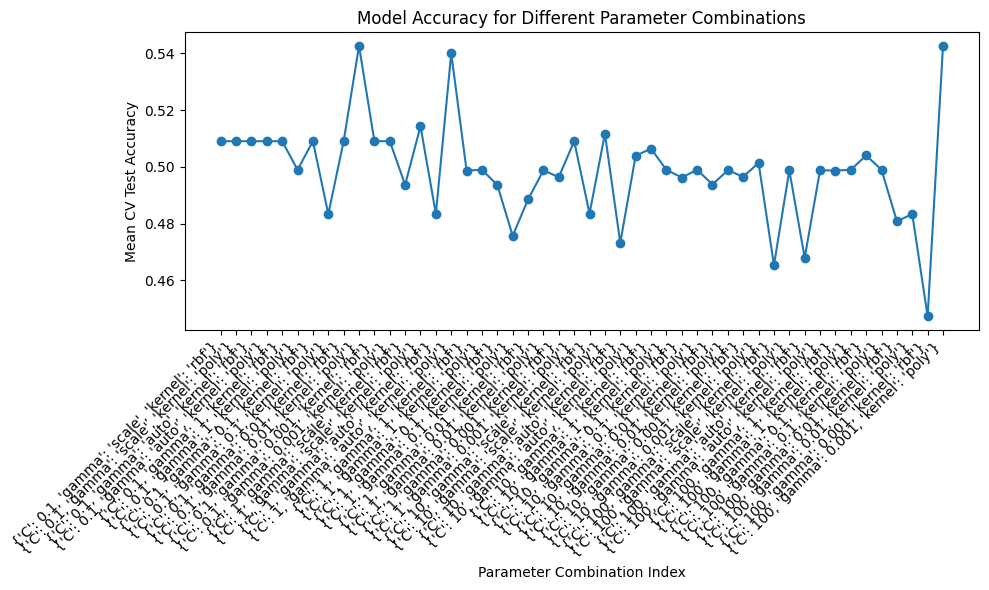

0.5426240426240427
Best parameters found: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Confusion Matrix with Best Estimator:
[[64  6]
 [80 16]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Example data (replace with your own dataset)
# X, y = your_data_features, your_data_labels

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf','poly']  # Specifies the kernel type to be used in the algorithm
}

X = X_pca
y = brain_symptomDF['Brain_brainfog']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Extract results
results = grid_search.cv_results_

# Plotting accuracies for each combination of parameters
plt.figure(figsize=(10, 6))
plt.plot(results['mean_test_score'], marker='o')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean CV Test Accuracy')
plt.title('Model Accuracy for Different Parameter Combinations')
plt.xticks(range(len(results['params'])), labels=[str(p) for p in results['params']], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Best Accuracy 
print(grid_search.best_score_)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Use the best estimator to make predictions
y_pred = grid_search.predict(X_test)

# Evaluating the model with the best estimator
print("Confusion Matrix with Best Estimator:")
print(confusion_matrix(y_test, y_pred))


1. Change PCA variance to lower to see if it increases the accuracy 
2. Instead of having just one brain symptom as target I can have multiple, add more and see if it increases 
i can branch out to anything 

70-80% is what we should be looking for 

this is real time data, lots of new data and not caputred before and no patterns have been found. the full process of this takes a very long time 

This case includes the target, if adding categories gives good results we can go on to add the number of target variables. 

